# Convolutional Auto-Encoders from the Ground-up

# Import libs that are used

Below we've listed a number of different libs and where they are used for:

- `numpy` : general computations
- `matplotlib` : Graphs & visuals
- `sklearn` : make a split (i.e. test/train) from the data we have
- `tensorflow` : For the autoencoder itself and to import the data

In [22]:
import numpy as np  # required for most computation
import pandas as pd
import matplotlib.pyplot as plt # for generating visuals
from sklearn.model_selection import train_test_split # Used to make the dataset split


# tensorflow libs
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score



In the code block below we load the data and check the dimensions of our data

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split the training data into training (80%) and validation (10%)
x_train, val_images, y_train, val_labels = train_test_split(
    x_train, y_train, test_size=0.1111
)  # 0.1111 gives approximately a 10% validation split

# Check the shapes of the splits
print("Training data shape:", x_train.shape, y_train.shape)
print("Validation data shape:", val_images.shape, val_labels.shape)
print("Testing data shape:", x_test.shape, x_test.shape)


Training data shape: (44445, 32, 32, 3) (44445, 1)
Validation data shape: (5555, 32, 32, 3) (5555, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 32, 32, 3)


## Model initialization

![Screenshot 2024-11-08 at 08-53-31 Lab_CAE.pdf.png](<attachment:Screenshot 2024-11-08 at 08-53-31 Lab_CAE.pdf.png>)
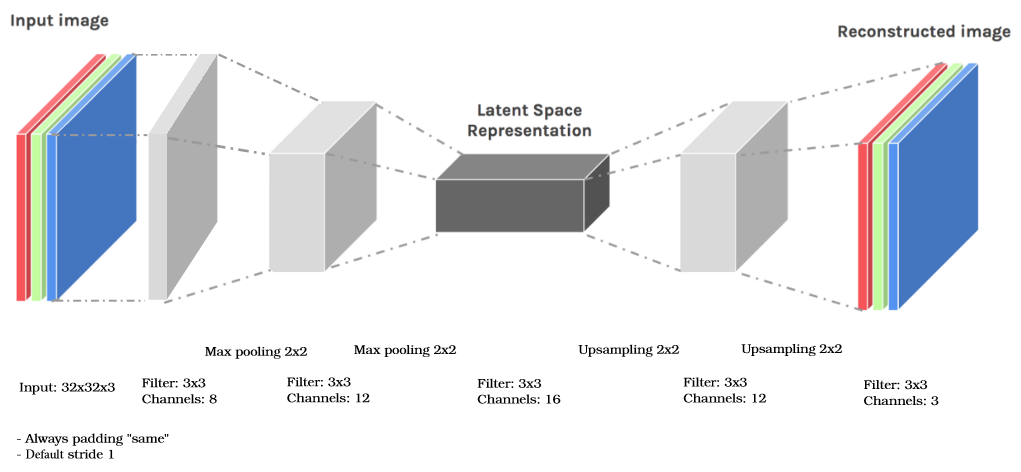

In [38]:
class Autoencoder(Model):
  def __init__(self, input_shape):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.GaussianNoise(0.1),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=1),
        layers.MaxPooling2D((2, 2), padding='same'),  # Downsample to 16x16x8

        layers.Conv2D(12, (3, 3), activation='relu', padding='same', strides=1),
        layers.MaxPooling2D((2, 2), padding='same'),  # Downsample to 8x8x12

        layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
        layers.MaxPooling2D((2, 2), padding='same')  # Latent space of size 4x4x16
    ])

    self.decoder = tf.keras.Sequential([
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.UpSampling2D((2, 2)),  # Upsample to 8x8x16

      layers.Conv2D(12, (3, 3), activation='relu', padding='same', strides=1),
      layers.UpSampling2D((2, 2)),  # Upsample to 16x16x12

      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=1),
      layers.UpSampling2D((2, 2)),  # Upsample to 32x32x8

      layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', strides=1)  # Output shape 32x32x3
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


input_shape = (32, 32, 3)
autoencoder = Autoencoder(input_shape)

In [39]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
history = autoencoder.fit(x_train, x_train,
                # batch_size=1024,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
44/44 [==============================] - 16s 339ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 2/10
44/44 [==============================] - 14s 318ms/step - loss: 0.0214 - val_loss: 0.0217
Epoch 3/10
44/44 [==============================] - 17s 392ms/step - loss: 0.0204 - val_loss: 0.0203
Epoch 4/10
44/44 [==============================] - 20s 445ms/step - loss: 0.0194 - val_loss: 0.0192
Epoch 5/10
44/44 [==============================] - 18s 400ms/step - loss: 0.0178 - val_loss: 0.0186
Epoch 6/10
44/44 [==============================] - 18s 406ms/step - loss: 0.0169 - val_loss: 0.0175
Epoch 7/10
44/44 [==============================] - 15s 338ms/step - loss: 0.0164 - val_loss: 0.0175
Epoch 8/10
44/44 [==============================] - 16s 358ms/step - loss: 0.0162 - val_loss: 0.0171
Epoch 9/10
44/44 [==============================] - 22s 501ms/step - loss: 0.0157 - val_loss: 0.0169
Epoch 10/10
44/44 [==============================] - 19s 420ms/step - loss: 0.0154 - val_lo

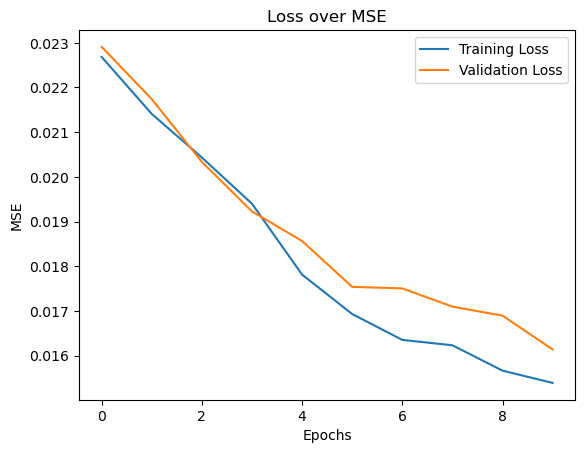

In [48]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Loss over MSE')
plt.legend()
plt.show()

In [ ]:
autoencoder.save("OvertrainedModel" ,save_format="tf")

INFO:tensorflow:Assets written to: NewModel\assets


INFO:tensorflow:Assets written to: NewModel\assets


In [44]:
load_autoencoder = tf.keras.models.load_model("NewModel")

In [50]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

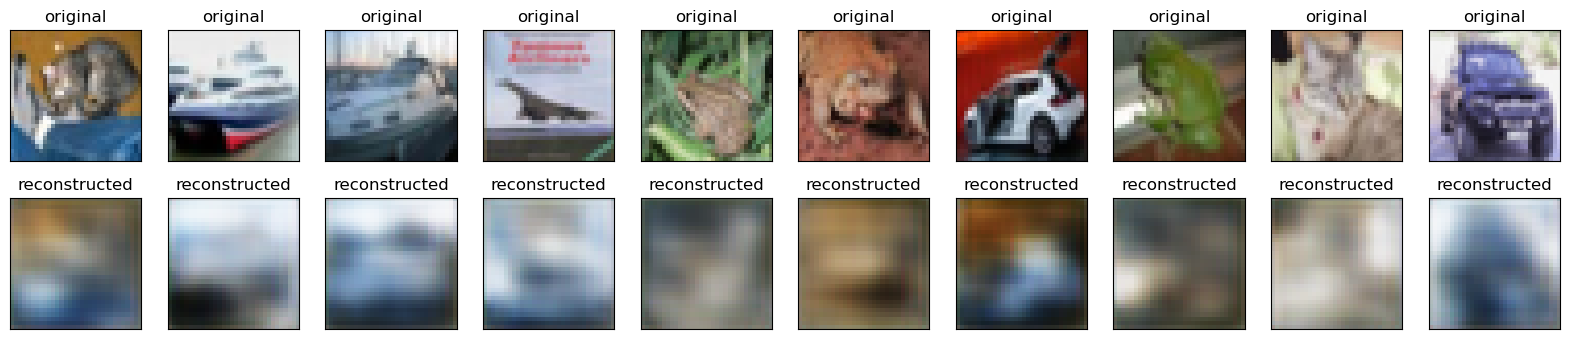

In [52]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()